<a href="https://colab.research.google.com/github/2000siddharth/web_scraping_classification/blob/master/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_csv('combined_youtube4.csv')

In [0]:
def cleaner(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can't", 'can not', phrase)
  
  # general
    phrase = re.sub(r"n\'t"," not", phrase)
    phrase = re.sub(r"\'re'"," are", phrase)
    phrase = re.sub(r"\'s"," is", phrase)
    phrase = re.sub(r"\'ll"," will", phrase)
    phrase = re.sub(r"\'d"," would", phrase)
    phrase = re.sub(r"\'t"," not", phrase)
    phrase = re.sub(r"\'ve"," have", phrase)
    phrase = re.sub(r"\'m"," am", phrase)
    
    return phrase

In [0]:
from bs4 import BeautifulSoup
from tqdm import tqdm
import re
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from nltk.corpus import stopwords

In [0]:
stop = set(stopwords.words('english'))
len(stop)

179

In [0]:
cleaned_title = []

for sentance in tqdm(df['title'].values):
    sentance = str(sentance)
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = cleaner(sentance)
    sentance = re.sub(r'[?|!|\'|"|#|+]', r'', sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stop)
    cleaned_title.append(sentance.strip())

100%|██████████| 10042/10042 [00:02<00:00, 4904.65it/s]


In [0]:
df['title'] = cleaned_title
df.head()

,video_id,title,description,category
0,https://www.youtube.com/watch?v=J8XJjkA5NuQ,dr p j abdul kalam lecture series iit bombay,"Techfest, IIT Bombay presents Dr. A. P. J. Abd...",tutorial
1,https://www.youtube.com/watch?v=C31hcftHBIk,lecture laa ke nachhatar gill full video song ...,Angel Records Presents New Punjabi Song Lectur...,tutorial
2,https://www.youtube.com/watch?v=Xn7KWR9EOGQ,basics stock market beginners lecture ca racha...,You can get my lectures from my new website ht...,tutorial
3,https://www.youtube.com/watch?v=FPaByTt1Yws,musique classique pour la lecture de mozart ch...,"Musique classique pour la lecture de Mozart, C...",tutorial
4,https://www.youtube.com/watch?v=ViyG77Bca4I,pte retell lecture january february predicted ...,This practice session covers the PTE: Retell l...,tutorial


In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

labels = LabelEncoder()
df['categoryid'] = labels.fit_transform(df['category'])

In [0]:
df.tail()

,video_id,title,description,category,categoryid
10037,https://www.youtube.com/watch?v=sZJucwMYOnc,muskegon free bookstore turns february,February is expected to be a month of celebrat...,art,0
10038,https://www.youtube.com/watch?v=A_uCQhN9UkM,hindu girl abducted wedding forcibly converted...,A yet another instance of abduction and forcib...,art,0
10039,https://www.youtube.com/watch?v=JajRTEPCYSI,thank bill balleza highlighting bill love wood...,NaN,art,0
10040,https://www.youtube.com/watch?v=7HPoGOHhbm8,camp livin support families lost members suicide,"For the second year in a row, Minnesota famili...",art,0
10041,https://www.youtube.com/watch?v=Ba8XeDUx2Ic,ajmer khwaja,अजमेर में गरीब नवाज के दरबार में वसंतोत्सव मना...,art,0


In [0]:
np.unique(df['category'])

array(['art', 'fashion', 'food', 'history', 'movies', 'music', 'science',
       'travel', 'tutorial', 'vlog'], dtype=object)

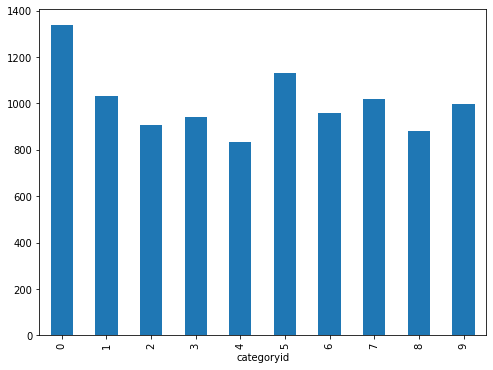

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('categoryid').title.count().plot.bar(ylim=0)
plt.show()

In [0]:
X = df['title']
y = df['categoryid']

#X_train, X_test, y_train, y_test = train_test_split(df['title'], df['categoryid'], random_state = 0)

In [0]:
#pipeline of feature engineering and model
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

model = Pipeline([('vectorizer', CountVectorizer()),
 ('tfidf', TfidfTransformer()),
 ('clf', OneVsRestClassifier(LinearSVC(class_weight="balanced")))])
#the class_weight="balanced" option tries to remove the biasedness of model towards majority sample

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [0]:
from sklearn.model_selection import learning_curve, GridSearchCV

parameters = {'vectorizer__ngram_range': [(1, 1), (1, 2),(2,2)],
               'tfidf__use_idf': (True, False)}

In [0]:
gs_clf_svm = GridSearchCV(model, parameters, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(X, y)
print(gs_clf_svm.best_score_)
print(gs_clf_svm.best_params_)

0.8427531288484686
{'tfidf__use_idf': True, 'vectorizer__ngram_range': (1, 2)}


In [0]:

#preparing the final pipeline using the selected parameters
model = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', OneVsRestClassifier(LinearSVC(class_weight="balanced")))])

In [0]:
model.fit(X_train, y_train)

NameError: ignored

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df['title'], df['categoryid'], random_state = 0)

In [0]:
pred = model.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(pred, y_test)

array([[337,   1,   2,   0,   1,   1,   2,   0,   1,   4],
       [  2, 164,   0,   1,   0,   0,   1,   0,  93,   1],
       [  2,   0, 216,   2,   0,   1,   1,   2,   0,   6],
       [  3,   2,   0, 201,   0,   0,   1,   0,   2,   1],
       [  1,   0,   0,   2, 208,   3,   1,   0,   0,   4],
       [  4,   2,   0,   1,   3, 269,   0,   0,   2,   0],
       [  0,   1,   0,   0,   0,   1, 211,   0,   0,   3],
       [  1,   0,   3,   1,   0,   1,   0, 248,   0,   2],
       [  5, 103,   2,   0,   0,   2,   1,   1, 131,   3],
       [  2,   0,   0,   0,   0,   0,   1,   6,   3, 228]])

In [0]:
accuracy_score(y_test, pred)

0.8813221823974512

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.title).toarray()
labels = df.categoryid
features.shape

(10042, 2994)

In [0]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for category, category_id in sorted(df['categoryid'].items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(category))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


X_train, X_test, y_train, y_test = train_test_split(df['title'], df['categoryid'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [0]:
print(clf.predict(count_vect.transform(["Smart tutorials and lectures beginners"])))

[8]


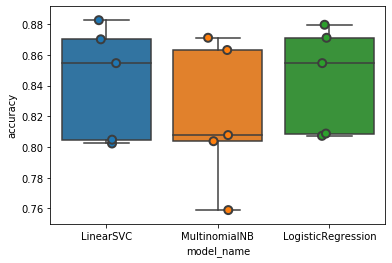

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [0]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC             0.842853
LogisticRegression    0.844248
MultinomialNB         0.820943
Name: accuracy, dtype: float64

In [0]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

In [0]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC


params_grid = {'C': [0.1, 1, 10, 100, 1000] , 'kernel': ['linear']}

grid = GridSearchCV(SVC(), params_grid, refit = True,n_jobs=-1, verbose = 3)


grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 20.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [0]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

params_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

grid = GridSearchCV(SVC(), params_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

In [0]:
model = LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [0]:
features = count_vect.fit_transform(df.title).toarray()
labels = df.categoryid
features.shape

(10042, 13723)

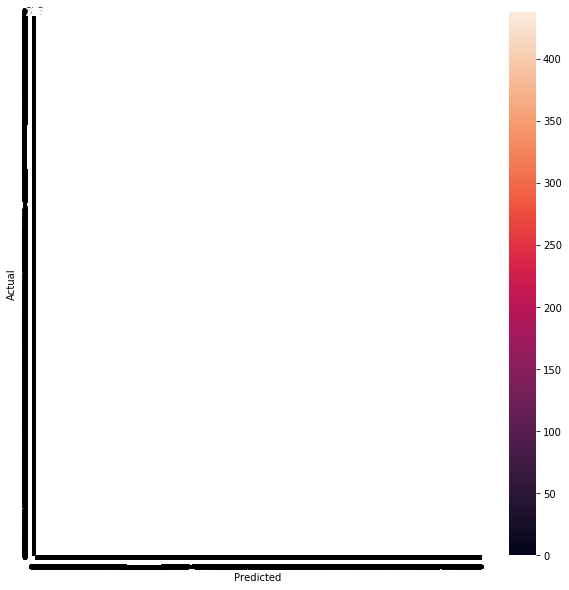

In [0]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df['categoryid'].values, yticklabels=df['categoryid'].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['category'].unique()))

              precision    recall  f1-score   support

    tutorial       0.91      0.95      0.93       459
     science       0.64      0.60      0.62       356
        vlog       0.95      0.94      0.95       285
        food       0.98      0.96      0.97       292
     fashion       0.96      0.97      0.97       290
      travel       0.98      0.95      0.96       370
       music       0.98      0.96      0.97       288
      movies       0.96      0.95      0.95       339
     history       0.53      0.57      0.55       297
         art       0.92      0.93      0.93       338

    accuracy                           0.88      3314
   macro avg       0.88      0.88      0.88      3314
weighted avg       0.88      0.88      0.88      3314



In [0]:
print ()